In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Define the stock symbol and time period
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-01-01"

In [3]:

# Fetch historical stock data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Extract the closing prices
closing_prices = stock_data['Close'].values.reshape(-1, 1)


In [4]:
# Normalize the data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(closing_prices)

In [5]:
# Split data into train and test sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [6]:
# Create sequences for LSTM training
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10
X_train = create_sequences(train_data, sequence_length)
y_train = train_data[sequence_length:]


In [7]:
# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
12/12 [==============================] - 4s 22ms/step - loss: 0.1341
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0558
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0114
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0052
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 8/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 10/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 11/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 12/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 13/50
12/12 [=======================

In [8]:
# Prepare test data for prediction
X_test = create_sequences(test_data, sequence_length)

# Make predictions
predicted_prices = model.predict(X_test)

2/2 [==============================] - 1s 8ms/step


In [9]:
# Inverse transform to get the actual stock prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(test_data[sequence_length:])


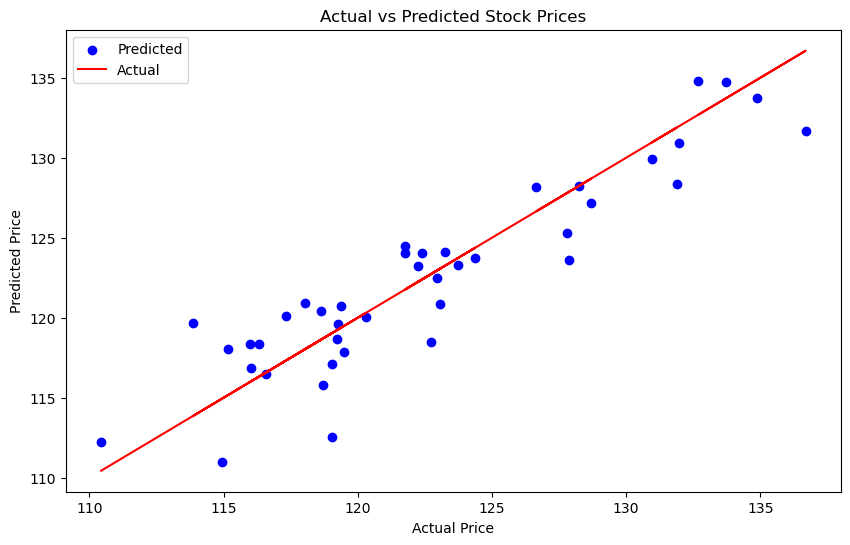

In [10]:
# Plot actual vs predicted prices using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, color='blue', label='Predicted')
plt.plot(actual_prices, actual_prices, color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()